In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Warning message:
"package 'rgdal' was built under R version 3.6.3"Warning message:
"package 'sp' was built under R version 3.6.3"Warning message:
"package 'ggmap' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'maptools' was built under R version 3.6.3"Warning message:
"package 'viridis' was built under R version 3.6.3"Warning message:
"package 'magrittr' was built under R version 3.6.3"Warning message:
"package 'scales' was built under R version 3.6.3"Warning message:
"package 'gridExtra' was built under R version 3.6.3"Warning message:
"package 'data.table' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R ve

[1] "C:/postcorona_DA/data"

Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
"Discarded datum International_Terrestrial_Reference_Frame_2000 in CRS definition: +proj=tmerc +lat_0=38 +lon_0=127.5 +k=0.9996 +x_0=1000000 +y_0=2000000 +ellps=GRS80 +units=m +no_defs"

OGR data source with driver: ESRI Shapefile 
Source: "C:\postcorona_DA\data\지도\CTPRVN.shp", layer: "CTPRVN"
with 17 features
It has 3 fields


Regions defined for each Polygons


'data.frame':	811814 obs. of  7 variables:
 $ long : num  966987 966987 966961 966931 966902 ...
 $ lat  : num  1941111 1941111 1941130 1941165 1941188 ...
 $ order: int  1 2 3 4 5 6 7 8 9 10 ...
 $ hole : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ piece: Factor w/ 2222 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id   : chr  "0" "0" "0" "0" ...
 $ group: Factor w/ 4724 levels "0.1","1.1","1.2",..: 1 1 1 1 1 1 1 1 1 1 ...


`summarise()` ungrouping output (override with `.groups` argument)


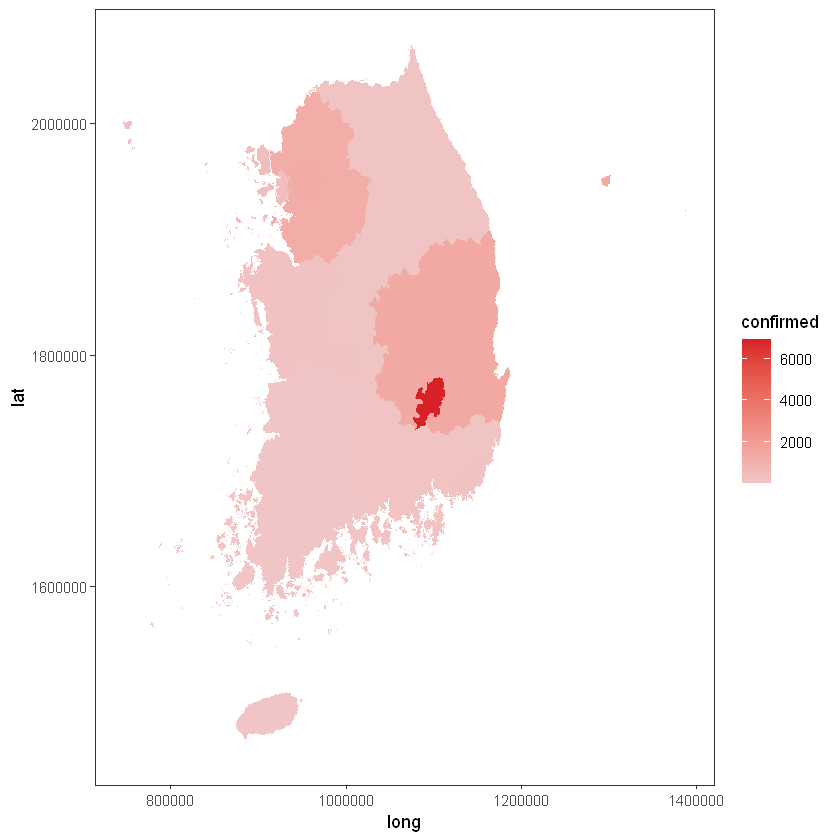

In [7]:

# 1 : preparation ---------------------------------------------------------
suppressPackageStartupMessages({ 
  library(rgdal,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(ggmap,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(sp,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(maptools,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(viridis,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(magrittr,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(scales,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(gridExtra,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(data.table, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(tidyverse, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(lubridate, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(gridExtra, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(factoextra, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(tfplot, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(tsfa, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(factoextra, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(cluster, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(IRdisplay, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(foreign,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(extrafont,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(showtext,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(grid,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
})


setwd('C:/postcorona_DA/data')
getwd()
# 2 : EDA -----------------------------------------------------------------

# 2-1 ---------------------------------------------------------------------
# A. 코로나19 사태 기본 분석
# 지역별, 나이대별, 성별 확진자 시각화
# a. 지역별 확진자 시각화 해석
# 지역별 확진자의 비율을 파악해 보도록 하겠습니다. 
# 먼저, 어떤 지역이 코로나 심각 지역인지 알아보기 위해 지역별 확진자의 수를 지도 위에 표시해 보도록 하겠습니다.

# C:/postcorona_DA/data/ =>C:/postcorona_DA/data/

#행정구역 지도를 가져와 줍니다.
korea_map_shp = rgdal::readOGR("C:/postcorona_DA/data/지도/CTPRVN.shp")
korea_map = fortify(korea_map_shp)


korea_map %>% str()

#지역별 확진자 수를 지도에 표시하기 위해 확진자 수 데이터를 가져오고, 알맞게 전처리해 줍니다.

TimeProvince <-fread('C:/postcorona_DA/data/COVID_19/TimeProvince.csv',
                     stringsAsFactors=FALSE, 
                     encoding = "UTF-8")

TimeProvince$date <- as.Date(TimeProvince$date)
TimeProvince$date <- as.character(TimeProvince$date,'%m/%d')

TimeProvince$province=TimeProvince$province %>% as.factor()

confirm_added=TimeProvince %>%
  group_by(province)%>% 
  summarize(N=max(confirmed))

confirm_added$province=plyr::revalue(confirm_added$province,c("서울"="0","부산"="1","대구"="2",
                                                              "인천"="3","광주"="4","대전"="5",
                                                              "울산"="6","세종"="7","경기도"="8",
                                                              "강원도"="9","충청북도"="10","충청남도"="11",
                                                              "전라북도"="12","전라남도"="13","경상북도"="14",
                                                              "경상남도"="15","제주도"="16"))


colnames(confirm_added)<-c("id","confirmed")


# 2-2 확진자 + 지도데이터 ---------------------------------------------------------

# 지도 데이터와 확진자 수 데이터를 해당하는 지역에 알맞게 병합하고, 지도에 나타내 줍니다.
# 각 지역별로 확진자 수를 넣고, 심각도에 따라 진한 색으로 나타내어 주었습니다.
# 서울, 경기, 경북, 그리고 대구가 코로나 19 확진자가 가장 많은 심각 지역인 것으로 보입니다.

korea_map=merge(korea_map,confirm_added, by="id")
mycorona=ggplot() + geom_polygon(data=korea_map, aes(x=long, y=lat, group=group, fill=confirmed))
mycorona+scale_fill_gradient(low = "#F1C5C5", high = "#D92027")+ 
  theme_bw() +
  theme(panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), 
        panel.grid.major.y = element_blank(), panel.grid.minor.y = element_blank(), 
        plot.title = element_text(face = "bold", size = 18, hjust = 0.5))







In [3]:
getwd()

[1] "C:/Users/familyhan/Documents/postcorona_DA"

## b. 나이대별,성별 확진자 시각화 해석
- 나이대별로는 20대, 50대가 가장 누적 확진자수가 가장 많고, 그 다음으로는 40, 60, 30 대 순으로 많았습니다.
- (index데이터에 있는 나이대와 동일하게 20대에서 60대만 확인했보았습니다.)
성별 확진자 시각화녀 확진자수 비율은 비슷하나, 여성이 좀 더 많음을 알 수 있습니다.

In [12]:
#전처리

age <- fread('C:/Users/familyhan/Documents/postcorona_DA/data/COVID_19/TimeAge.csv',
             stringsAsFactors=FALSE,
             data.table=FALSE,
             encoding = "UTF-8")
age <- age[age$date == '2020-06-30',] 
age <- age[c(3:7),]


#### #plot_age

In [13]:
c <-ggplot(age, aes(x = "", y = confirmed, fill = age)) + 
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y") +
  geom_text(aes(label = paste0(age,"\n",round(confirmed/128,1),"%")), 
           position = position_stack(vjust = 0.5),color = "white") +
  scale_fill_manual(values = c("#CD0000","#F06E6E","#D25A5A","#CD4646","#FF7878","#F4A0A0","#FA8282")) +
  theme_void()   +
  theme(text =element_text(face = "bold"))

### #plot_gender

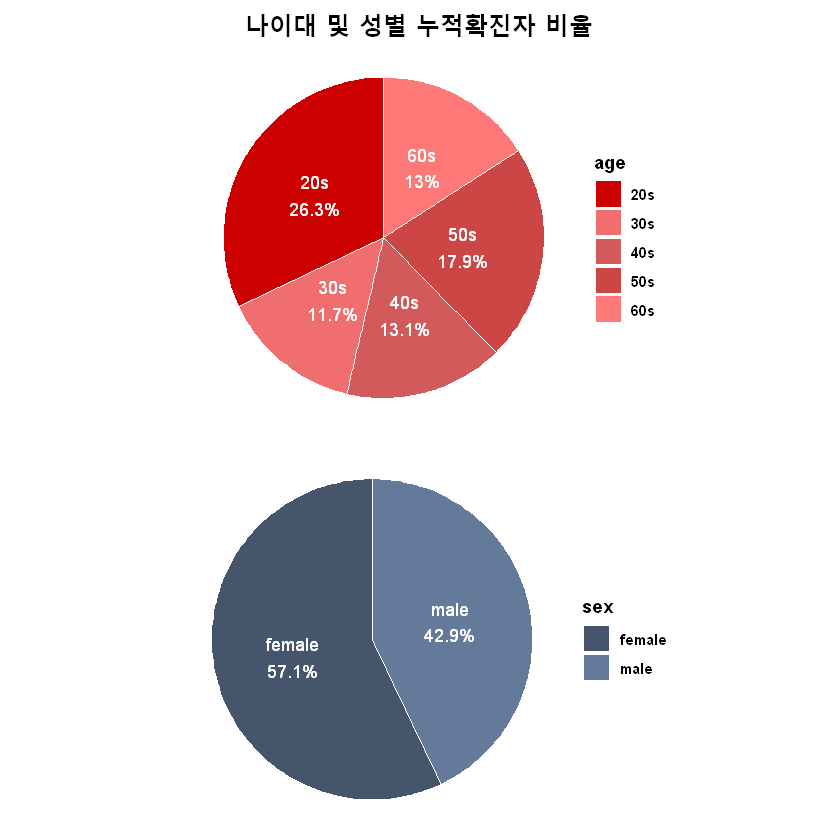

In [14]:

gender <- fread('COVID_19/TimeGender.csv', stringsAsFactors=FALSE,data.table=FALSE, encoding = "UTF-8")

gender <- gender[gender$date == '2020-06-30',]

d <-ggplot(gender, aes(x = "", y = confirmed, fill = sex)) + 
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y") +
  geom_text(aes(label = paste0(sex,"\n",round(confirmed/128,1),"%")), 
           position = position_stack(vjust = 0.5),color = "white") +
  scale_fill_manual(values = c("#45556b","#637a9a")) +
  theme_void() +theme(text =element_text(face = "bold"))

grid.arrange(c,d, nrow=2, top = textGrob("나이대 및 성별 누적확진자 비율",gp=gpar(fontsize=20,font=2)))  


## 실확진자 추이 및 유동인구 추이 시각화
-  a. 실확진자 추이 시각화
- 이를 통해 2020년 2월 29일에 신천지 코로나 확산으로 인해 가장 실확진자 수가 많았고, 5월 2일에 가장 적었음을 알 수 있습니다.
- 줄어가는 추세이긴 하지만 종종 특정 사건들로 인해 확진자수가 늘어나기도 하는 상황임을 알

In [15]:
##### 전처리

Time <-fread('COVID_19/Time.csv', stringsAsFactors=FALSE,data.table=FALSE, encoding = "UTF-8")
Time$date <- as.Date(Time$date)
str(Time)

c <- c(rep(0,163))
c[1] <- 1
for (i in 2:length(Time$confirmed)){
  if (Time$confirmed[i] - Time$confirmed[i-1] > 0) {
    c[i] <- Time$confirmed[i] - Time$confirmed[i-1]
  }else{
    c[i] <- 0
  }
}

Time <- cbind(Time, c)

'data.frame':	163 obs. of  7 variables:
 $ date     : Date, format: "2020-01-20" "2020-01-21" ...
 $ time     : int  16 16 16 16 16 16 16 16 16 16 ...
 $ test     : int  1 1 4 22 27 27 51 61 116 187 ...
 $ negative : int  0 0 3 21 25 25 47 56 97 155 ...
 $ confirmed: int  1 1 1 1 2 2 3 4 4 4 ...
 $ released : int  0 0 0 0 0 0 0 0 0 0 ...
 $ deceased : int  0 0 0 0 0 0 0 0 0 0 ...


Warning message:
"Use of `Time$date` is discouraged. Use `date` instead."Warning message:
"Use of `Time$c` is discouraged. Use `c` instead."Warning message:
"Use of `Time$date` is discouraged. Use `date` instead."

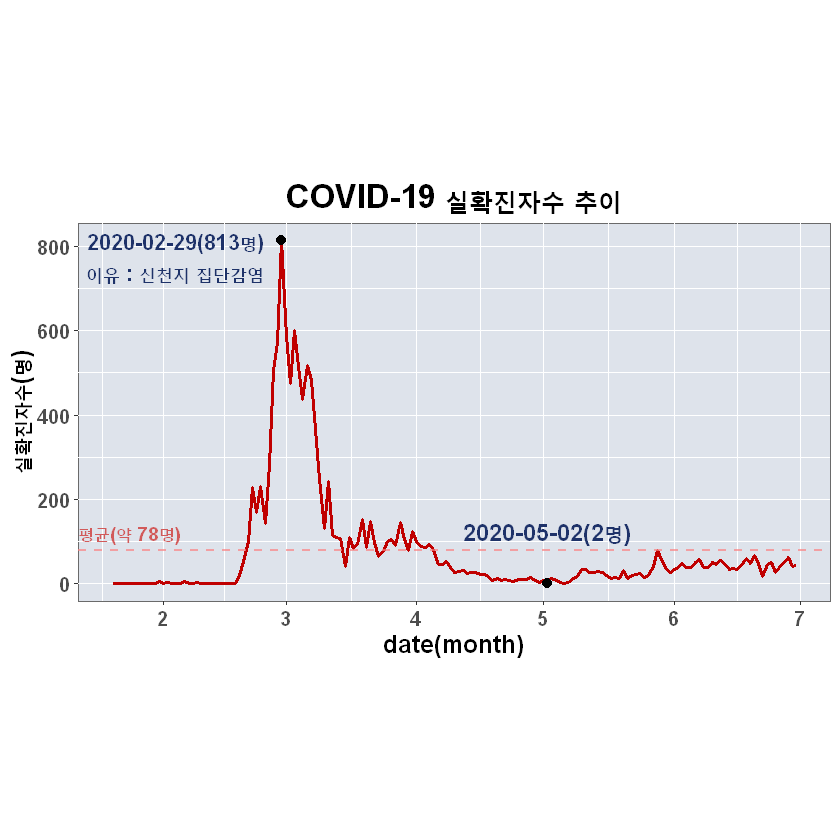

In [16]:
#plot 

ggplot(Time, aes(x =date, y = `c`)) + geom_line(color='#c00000', size = 0.9) + coord_fixed(ratio = 0.1) +
 theme(panel.background = element_rect(fill = "#dee3eb" , color = "#6a6a6a"),plot.background = element_rect(fill = "white",
                                size = 0.5, linetype = "solid"),panel.grid.major = element_line(color = "white"),
      plot.title = element_text(face = "bold",hjust = 0.5, size =20),text =element_text(face = "bold", size =15)) +
 ggtitle("COVID-19 실확진자수 추이") +  xlab("date(month)") + ylab("실확진자수(명)")+
 geom_point(mapping =aes(x =Time$date[which.max(Time$`c`)] ,y = 813 ), color="black", size =2.5)+ 
 annotate("text", x=Time$date[which.max(Time$`c`)], y=813,fontface=2,label="\n2020-02-29(813명)\n이유 : 신천지 집단감염",hjust = 1.1, size = 4.6 , color = "#1E3269") +
 geom_point(mapping =aes(x =Time$date[104] ,y = 2 ), color="black", size =2.5) +
 annotate("text", x=Time$date[104], y=2, label="2020-05-02(2명)\n\n\n", size = 5 ,fontface=2, color = "#1E3269") +
 geom_hline(yintercept=78.53, linetype='dashed', color='#FA8282', size=0.7,alpha = 0.7)+
 annotate("text", x=Time$date[5], y=120, label="평균(약 78명)", size = 4 , fontface=2, color = "#D25A5A")

#### b. 유동인구 추이 시각화
- 다음으로는 유동인구 데이터(fpopl)를 이용하여, 주별 유동인구 평균 데이터를 만들어 주별 실확진자 수 추이와 비교해보았습니다.

##### 결 과
- 실확진자 수가 가장 많았던 시기에(신천지로 인한 확산)에 유동인구가 줄었고, 그 이후에는 유동인구가 점점 증가하였습니다.
- 따라서 대중의 오프라인 활동과 코로나 확진자 수는 상관관계가 있으며,확진자가 상대적으로 감소한 현재는 다소 경각심이 해이해진 경향을 보인다고 해석할 수 있습니다.

In [17]:
#전처리
#1. fpopl data 를 주별 유동인구 평균 데이터로 전처리
fpopl <-fread('fpopl.csv', stringsAsFactors=FALSE,data.table=FALSE, encoding = "UTF-8")
fpopl %<>% select(base_ymd,adstrd_code,popltn_cascnt)
code <-fread('adstrd_master.csv', stringsAsFactors=FALSE,data.table=FALSE, encoding = "UTF-8")
code %<>% select(adstrd_code,signgu_nm)

doraga <- left_join(fpopl,code,by="adstrd_code")
doraga %<>% select(-adstrd_code)
doraga$base_ymd <- as.character(doraga$base_ymd)
doraga$base_ymd <- as.Date(doraga$base_ymd,"%Y%m%d")
doraga$base_ymd <- week(doraga$base_ymd)


week <- c(1:24)
fpopl_mean <- c(rep(0,24))
df <- data.frame(week,fpopl_mean)


for (i in 1:24){
  a <- doraga %>% filter(base_ymd == i) %>% summarise(n=mean(popltn_cascnt))
  df$fpopl_mean[i] <- a$n
}

`summarise()` ungrouping output (override with `.groups` argument)


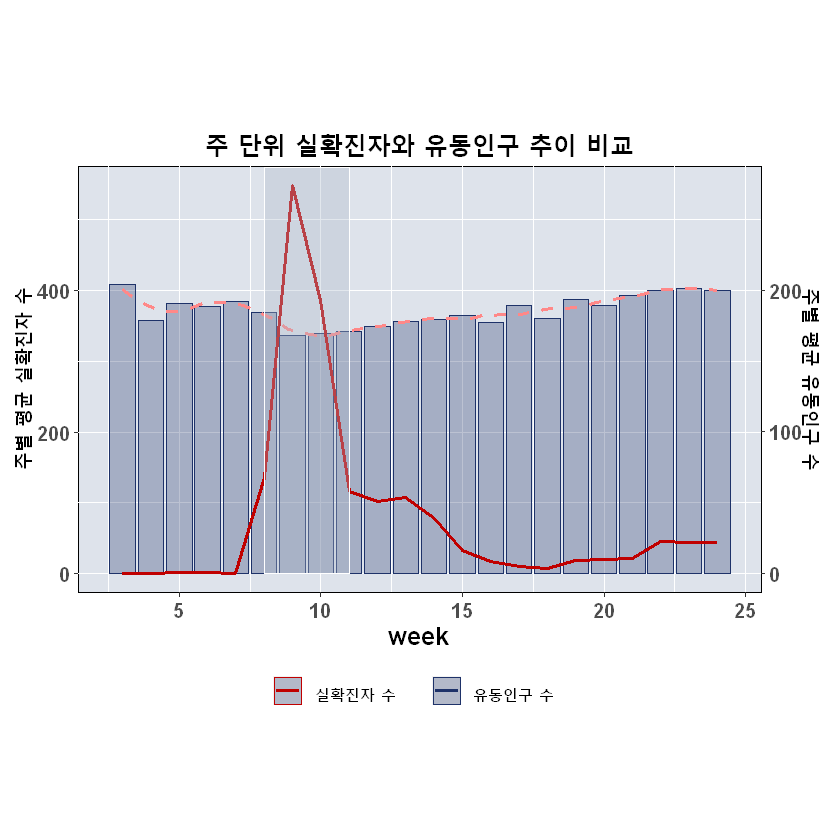

In [18]:
#2. 전처리한 유동인구 데이터와 실확진자 수 비교를 위해time 데이터와 병합

Time$date <- week(Time$date)
Time %<>% group_by(date) %>% summarize(c_mean= mean(c)) %>% unique()
colnames(Time) <- c("week","c_mean")

time_fpopl <- plyr::join(Time, df, by = "week")
time_fpopl <- time_fpopl[time_fpopl$week <= 24,] 

#plot 
period <-data.frame(시기 = c("2"),start =c(8), end=c(11))
ggplot() +
  geom_bar(data=time_fpopl, aes(x = week, y = fpopl_mean*2 ,color = "유동인구 수") ,fill = '#1E3269',alpha= 0.3,stat ="identity", position="dodge")+ 
  ylab("명") +geom_smooth(data=time_fpopl, aes(x = week, y = fpopl_mean*2),method = 'loess', formula ='y ~ x',span = 0.3, color = "#ff8888",size = 0.9,se =F, linetype= "dashed")+
  geom_line(data=time_fpopl, aes(x = week, y = c_mean, color = "실확진자 수"),size =0.9)+
  scale_colour_manual("", values=c("실확진자 수" = "#c00000", "유동인구 수" = "#1E3269"))  + coord_fixed(ratio = 0.025) +
  theme(panel.background = element_rect(fill = "#dee3eb" , color = "black"),plot.background = element_rect(fill = "white",
                                size = 0.5, linetype = "solid"),legend.position="bottom", plot.title = element_text(face = "bold",hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5, size =15)) +
  ggtitle("주 단위 실확진자와 유동인구 추이 비교")+
  scale_y_continuous(
    
    # Features of the first axis
    name = "주별 평균 실확진자 수",
    
    # Add a second axis and specify its features
    sec.axis = sec_axis(~./2, name="주별 평균 유동인구 수")
  )+
 geom_rect(data=period, aes(NULL,NULL,xmin=start,xmax=end),fill="#adb9ca",
            ymin=0,ymax=573, colour="white", size=0.5, alpha=0.35)

# 2.본론
#### A. Delivery data로 유망 산업 살펴보기
##### - 첫째로, 배달 호출 정보 데이터(delivery)를 이용해 유망 산업을 살펴보겠습니다.
우선 필요한 데이터를 호출하고, 전처리를 진행해 봅시다.

### 전처리 - delivery

In [19]:
delivery <- fread('delivery.csv', 
                  header = T, 
                  stringsAsFactors = F, 
                  data.table = F, 
                  encoding = 'UTF-8'
                  )

code = delivery %>% select(ends_with('code')) %>% colnames()
id = c('SERIAL_NUMBER', colnames(select(delivery, ends_with('ID'))))

delivery = delivery %>% select(-c(code, id))
delivery = delivery %>% separate(PROCESS_DT, sep = '-', into = c('year', 'month', 'day'), remove = FALSE)

rm(list = c('code', 'id'))

Note: Using an external vector in selections is ambiguous.
i Use `all_of(code)` instead of `code` to silence this message.
i See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.
Note: Using an external vector in selections is ambiguous.
i Use `all_of(id)` instead of `id` to silence this message.
i See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


ERROR: Error: 크기가 39.4 Mb인 벡터를 할당할 수 없습니다


#### a. 일자별 평균 배달 건수 및 매출 추이

In [ ]:
index <- data.frame('period' = c('기', '승', '전-1', '전-2'),
                    'start' = c('2020-01-01', '2020-02-22', '2020-03-08', '2020-05-06'),
                    'end' = c('2020-02-22', '2020-03-08', '2020-05-06', '2020-06-21'))


p1 <- delivery %>% group_by(PROCESS_DT) %>% 
  summarize(N = n()) %>% 
  ungroup() %>% 
  ggplot(aes(x = PROCESS_DT, y = N, group = 1)) + 
  geom_line(linetype = "dashed", color = 'black') + 
  geom_smooth(method = 'lm', se = FALSE, formula = y~x, color = 'firebrick', linetype = 'longdash') +
  geom_point(color = "red", size = 1) +
  geom_rect(data = index,
            aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
            ymin = 0, ymax = 47000, alpha=0.5) +
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5', '전-2' = '#adb9ca')) +
  labs(x = "일자", y = '평균 배달 건수', title = '일별 평균 배달 건수', fill = '코로나 시기') +
  scale_x_discrete(breaks = NULL) +
  theme(legend.position = 'bottom', legend.box = 'vertical') + 
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))


p2 <- delivery %>% filter(DLVR_REQUST_STTUS_VALUE == 1) %>% 
  mutate('SELL_AMOUNT' = GOODS_AMOUNT - DLVR_AMOUNT - CALL_RLAY_FEE_AMOUNT) %>% 
  group_by(PROCESS_DT) %>% 
  summarize(MEAN = mean(SELL_AMOUNT)) %>% 
  ungroup() %>% 
  ggplot(aes(x = PROCESS_DT, y = MEAN, group = 1)) + 
  geom_line(linetype = "dashed", color = 'black') + 
  geom_smooth(method = 'lm', se = FALSE, formula = y~x, color = 'firebrick', linetype = 'longdash') +
  geom_point(color = "red", size = 1) +
  geom_rect(data = index,
            aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
            ymin = 0, ymax = 45224, alpha=0.5) +
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5', '전-2' = '#adb9ca')) +
  labs(x = "일자", y = '평균 배달 매출', title = '일별 평균 배달 매출', fill = '코로나 시기') +
  scale_x_discrete(breaks = NULL) +
  theme(legend.position = 'bottom', legend.box = 'vertical') + 
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))
grid.arrange(p1, p2, ncol = 1)

##### b. 코로나 심각 지역(서울, 경기도, 대구, 경상북도)와 그 외 지역 배달 건수 비교

In [ ]:
delivery$bad = ifelse(delivery$DLVR_STORE_SIDO %in% c('경기도', '경상북도', '대구광역시', '서울'), 1, 0)

delivery %>% 
  group_by(PROCESS_DT, bad) %>% 
  summarize(N = n()) %>% 
  ungroup() %>%
  ggplot(aes(x = PROCESS_DT, y = N)) + 
  geom_line(aes(group = as.factor(bad), color = as.factor(bad)), size = 0.6) +
  geom_smooth(aes(group = as.factor(bad), color = as.factor(bad)), 
              method = 'lm', se = FALSE, formula = y~x, linetype = 'longdash') +
  geom_rect(data = index,
            aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
            ymin = 0, ymax = 30000, alpha=0.5) +
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5', '전-2' = '#adb9ca')) +
  scale_linetype_discrete('코로나 심각 수준(지역)', labels = c('완만', '심각'), aes(Color = as.factor(bad))) +
  scale_color_manual(labels = c('완만', '심각'),values=c( "#1E3269","#c00000")) +
  scale_x_discrete(breaks = NULL) +
  labs(x = '일자', color = '코로나 심각 수준(지역)', y = '배달 건수', fill = '코로나 시기') +
  ggtitle('코로나 심각지역 vs 완만지역 일별 배달건수') +
  theme(legend.position = 'bottom', legend.box = 'vertical') + 
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))

- 코로나 심각지역(서울, 경기도, 경상북도, 대구) 의 경우 배달 건수 증가 추세 가 더 가파르다는 것을 확인 할 수 있습니다.
- 코로나 완만지역(그 외 지역) 의 경우 코로나 심각지역만큼은 아니지만 어느 정도 증가 추세를 확인 할 수 있습니다.
#### 계절성 제거를 위해 월별로 나누어서 다시 확인해 보겠습니다.

### c. 배달 품목별 건수를 통한 유망 품목 확인

In [ ]:
month_index <- data.frame('period' = c('기', '승', '전-1'),
                          'start' = c('01', '02', '03'),
                          'end' = c('02', '03', '05'))

p1 <- delivery  %>% 
  filter(DLVR_REQUST_STTUS_VALUE == 1) %>% 
  mutate('SELL_AMOUNT' = GOODS_AMOUNT - DLVR_AMOUNT - CALL_RLAY_FEE_AMOUNT) %>% 
  group_by(month, DLVR_STORE_INDUTY_NM) %>% 
  summarise(MEAN = mean(SELL_AMOUNT)) %>% 
  ungroup() %>%
  filter(month != "06") %>% 
  mutate('NEW_cate' = ifelse(DLVR_STORE_INDUTY_NM %in% c('심부름', '도시락') , 1, 0)) %>%  
  ggplot(aes(x = month, y = MEAN)) +
  geom_smooth(aes(group = DLVR_STORE_INDUTY_NM, 
                  color= DLVR_STORE_INDUTY_NM, 
                  linetype = as.factor(NEW_cate), 
                  size = as.factor(NEW_cate)), method = 'lm', se = FALSE, formula = y~x) +
  geom_rect(data = month_index,
            aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
            ymin = 0, ymax = 33000, alpha=0.5) + 
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5')) +
  scale_linetype_manual(values=c("dashed", "solid"),labels = c('그외', '심부름&도시락'))+
  scale_size_manual(values = c(1, 1.1), guide = 'none') +
  guides(color = FALSE) +
  labs(x = '월', y = '평균 배달 매출', linetype = '매출 성장 추세', fill = '코로나 시기', color = '배달품목') +
  ggtitle('배달품목별 월별 매출 변화 추세') +
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))


p2 <- delivery  %>%
  filter(DLVR_REQUST_STTUS_VALUE == 1) %>% 
  mutate('SELL_AMOUNT' = GOODS_AMOUNT - DLVR_AMOUNT - CALL_RLAY_FEE_AMOUNT) %>% 
  group_by(month, DLVR_STORE_INDUTY_NM) %>% 
  summarise(MEAN = mean(SELL_AMOUNT)) %>% 
  ungroup() %>% 
  filter(month != "06") %>%
  filter(DLVR_STORE_INDUTY_NM %in% c('심부름', '도시락')) %>% 
  ggplot(aes(x = month, y = MEAN)) +
  geom_line(aes(group = DLVR_STORE_INDUTY_NM, color= DLVR_STORE_INDUTY_NM)) +
  geom_point(aes(group = DLVR_STORE_INDUTY_NM, color= DLVR_STORE_INDUTY_NM) ,size = 1) + 
  geom_smooth(aes(group = DLVR_STORE_INDUTY_NM, color= DLVR_STORE_INDUTY_NM), 
              method = 'lm', se = FALSE, formula = y~x, linetype = 'longdash') +
  geom_rect(data = month_index,
            aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
            ymin = 0, ymax = 30000, alpha=0.5) + 
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5')) +
  scale_color_manual(values=c( "#1E3269","#c00000")) +
  labs(x = '월', y = '평균 배달 매출', fill = '코로나 시기', color = '배달품목') +
  ggtitle('배달품목별 월별 매출 변화 추세') +
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))



grid.arrange(p1, p2, ncol = 1)

- 6월달의 경우 6월 21일까지 밖에 없어 제외하고 추세 확인
- 심부름&도시락 품목이 다른 품목들에 비해 두드러지게 배달 건수가 증가하는 것 을 확인 할 수 있습니다.
- 도시락 같은 경우 기~승 단계에 급격히 증가하는 추세 를 확인 할 수 있습니다.
- 심부름 같은 경우 전-1 단계에서 급격히 증가하는 추세 를 확인 할 수 있습니다.
- 심부름&도시락 과 다른 품목들의 배달 매출과 증가율을 확인해 보겠습니다.

## d. 도시락,심부름 vs 그외품목 : 
##### 월별 건수>% 
##### mutate('SELL_AMOUNT' = GOODS_AMOUNT - DLVR_AMOUNT - CALL_RLAY_FEE_AMOUNT)
##### %>% mutate('NEW_cate' = ifelse(DLVR_STORE_INDUTY_NM %in% c('심부름', '도시락') , 1, 0))

In [ ]:
p1 <- delivery %>% group_by(month, NEW_cate) %>% 
  summarise(MEAN = mean(SELL_AMOUNT)) %>% 
  ungroup() %>% 
  filter(month != "06") %>% 
  ggplot(aes(x = month, y = MEAN)) +
  geom_line(aes(group = as.factor(NEW_cate), color = as.factor(NEW_cate))) +
  geom_point(aes(group = as.factor(NEW_cate), color = as.factor(NEW_cate)), size = 1) +
  geom_smooth(aes(group = as.factor(NEW_cate), color = as.factor(NEW_cate)),
              method = 'lm', se = FALSE, formula = y~x, linetype = 'longdash') +
  geom_rect(data = month_index,
            aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
            ymin = 0, ymax = 33000, alpha=0.5) + 
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5')) +
  scale_color_manual(labels = c('그외', '심부름&도시락'), values=c( "#1E3269","#c00000")) +
  labs(x = '월', color = '배달품목', y = '월별 평균 배달 매출', fill = '코로나 시기') +
  ggtitle('배달품목별 월별 매출 변화 추세') +
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))


p2 <- delivery %>% group_by(month, NEW_cate) %>% 
  summarise(MEAN = mean(n())) %>%
  ungroup() %>%
  filter(month != "06") %>% 
  ggplot(aes(x = month, y = MEAN)) +
  geom_line(aes(group = as.factor(NEW_cate), color = as.factor(NEW_cate))) +
  geom_point(aes(group = as.factor(NEW_cate), color = as.factor(NEW_cate)), size = 1) +
  geom_smooth(aes(group = as.factor(NEW_cate), color = as.factor(NEW_cate)),
              method = 'lm', se = FALSE, formula = y~x, linetype = 'longdash') +
  geom_rect(data = month_index,
            aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
            ymin = -1000000, ymax = 1200000, alpha=0.5) +
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5')) +
  scale_color_manual(labels = c('그외', '심부름&도시락'), values=c( "#1E3269","#c00000")) +
  labs(x = '월', color = '배달품목', y = '월별 배달 건수', fill = '코로나 시기') +
  ggtitle('배달품목별 월별 건수 변화 추세') +
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))

grid.arrange(p1, p2, ncol = 1)

## e. 도시락,심부름 : 월별 건수 변화 및 추세

In [ ]:
delivery %>% group_by(month, NEW_cate) %>% 
  summarise(MEAN = mean(n())) %>%
  ungroup() %>%
  filter(month != "06") %>%
  filter(NEW_cate == 1) %>% 
  ggplot(aes(x = month, y = MEAN)) +
  geom_line(group = 1, color = "#c00000") +
  geom_point(group = 1, color = "#c00000", size = 1) +
  geom_smooth(aes(group = 1), 
              color = "#c00000", method = 'lm', se = FALSE, formula = y ~ x + I(x^2), linetype = 'longdash') +
  geom_rect(data = month_index,
            aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
            ymin = 0, ymax = 15000, alpha=0.5) +
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5')) +
  labs(x = '월', y = '월별 배달 건수', fill = '코로나 시기') +
  ggtitle('도시락&심부름 : 월별 건수 변화 및 추세') +
  theme(legend.position = 'bottom') +
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,30,30,30))

In [ ]:
- 6월달의 경우 6월 21일까지 밖에 없어 제외하고 확인
- 심부름&도시락 품목이 다른 품목들에 비해 확연하게 배달 매출이 증가한 것 을 확인 할 수 있습니다.
- 코로나로 인해 직장인들이 밖에서가 아닌 회사 내부에서 점심을 해결하는 경향이 증가 해서 도시락&배달 심부름 이 증가한 것이 아닌가 유추할 수 있습니다
- 흥미로운 점은 심부름&도시락 품목의 월별 배달 건수는 오목 함수(Concave) 형태라는 것 입니다.
- 이는 직장이들이 한번에 대량으로 점심 식사를 주문 해서 그런 것 아닌가 하고 유추할 수 있습니다.
- 결론적으로 직장인들의 대량적인 점심식사 소비 가 심부름&도시락 매출 증가 에 큰 영향을 끼쳤다고 유추 할 수 있습니다.